# 2 Descriptors

The descriptor summarizes the local structure around keypoints.

There are many available classical descriptors and there are learned ones available.

One of the powerful ones is a SIFT descriptor.

Here we implement it only partially.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Load two images

image_1_color = np.asarray(Image.open('data/mountain_1.jpg'), dtype=np.float32) / 255.
image_2_color = np.asarray(Image.open('data/mountain_2.jpg'), dtype=np.float32) / 255.

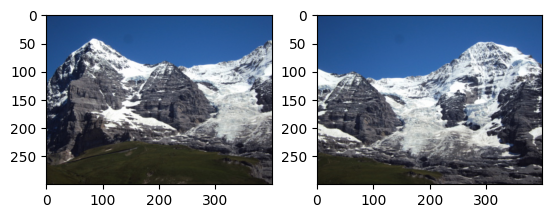

In [2]:
f, ax = plt.subplots(1,2)
ax[0].imshow(image_1_color)
ax[1].imshow(image_2_color)

In [7]:
# Here we have two colored images, but as before, algorithms work on grayscale images.
# We can convert the images to grayscale using the formula:
# grayscale = 0.2989 * red + 0.5870 * green + 0.1140 * blue

def rgb2gray(rgb: np.ndarray) -> np.ndarray:
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

image_1 = rgb2gray(image_1_color)
image_2 = rgb2gray(image_2_color)


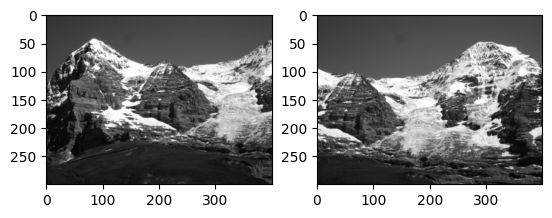

In [4]:
f, ax = plt.subplots(1,2)
ax[0].imshow(image_1, cmap='gray')
ax[1].imshow(image_2, cmap='gray')

As a first step let's pre-compute keypoints.

(434, 2)
(504, 2)


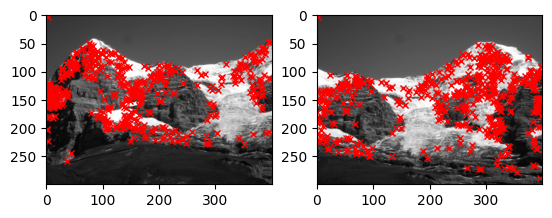

In [6]:
from src.compute_corners import compute_corners, CornerCriterion

corners_image_1 = compute_corners(image_1, CornerCriterion.SHI_TOMASI, 0.2)
corners_image_2 = compute_corners(image_2, CornerCriterion.SHI_TOMASI, 0.2)
print(corners_image_1.shape)
print(corners_image_2.shape)

f, ax = plt.subplots(1,2)
ax[0].imshow(image_1, cmap="grey")
ax[0].plot(corners_image_1[:,0], corners_image_1[:,1], 'rx', markersize=5)

ax[1].imshow(image_2, cmap="grey")
ax[1].plot(corners_image_2[:,0], corners_image_2[:,1], 'rx', markersize=5)


## SIFT-Descriptor

SIFT-descriptor is computed around keypoint on a 16x16 image patch around keypoint. We create a histogram of oriented gradients.

